# 📘 Data Loading and Initial Exploration

This section of the code focuses on loading the dataset, performing a quick inspection, and understanding the structure of the data before any preprocessing or modeling steps.  
Each choice made below ensures the analyst gains an immediate overview of the dataset’s composition and quality.

---

### **Code & Explanation**

```python
import pandas as pd
# Choice: Import the pandas library.
```
Justification: pandas is the most widely used library for data manipulation and analysis in Python.
It provides high-performance data structures like the DataFrame, which allows for easy reading,
filtering, summarizing, and cleaning of tabular datasets.
```python
df = pd.read_csv('/kaggle/input/airline-passangers-booking-data/Passanger_booking_data.csv')
```
Choice: Read the dataset from a CSV file using pd.read_csv().
Justification: read_csv is the most common and efficient way to load structured data into a pandas DataFrame.
The path /kaggle/input/... indicates this notebook is being run on Kaggle,
where datasets are stored in a standardized input directory.
By storing it in df, we create a DataFrame object that will hold all rows and columns
of our dataset for further analysis.
```python

print("First 5 rows of the dataset:")
print(df.head())
```
Choice: Display the first 5 rows using df.head().
Justification: This is an essential first step in any data exploration workflow.
df.head() quickly previews the top rows, helping verify that the dataset loaded correctly,
that column names are as expected, and that there are no obvious formatting or encoding issues.
It gives an immediate sense of what types of values each feature contains.

```python

print("\nDataset Information:")
df.info()
```
Choice: Call df.info() to display metadata about the dataset.
Justification: info() provides details such as the number of rows, column names,
data types, and non-null counts. This is critical for identifying missing values,
understanding data volume, and checking whether each column has the appropriate data type
(e.g., integers for counts, floats for continuous values, or objects for categorical data).
The preceding print ensures clean formatting in the console output.

```python

print("\nDescriptive Statistics:")
print(df.describe())
```
Choice: Use df.describe() to generate descriptive statistics.
Justification: This method summarizes numerical columns by providing metrics like mean,
standard deviation, min, max, and quartile values. These insights help identify outliers,
scaling issues, and general trends in the data distribution.
Including the print statement ensures that this output appears clearly separated from previous sections
when displayed.


In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/airline-passangers-booking-data/Passanger_booking_data.csv')


print("Unique values in 'flight_day':")
print(df['flight_day'].unique())
print(f"Count: {df['flight_day'].nunique()} unique days")

print("\nUnique values in 'sales_channel':")
print(df['sales_channel'].unique())

print("\nUnique values in 'trip_type':")
print(df['trip_type'].unique())

print("\nTop 10 booking origins:")
print(df['booking_origin'].value_counts().head(10))

Unique values in 'flight_day':
['Tue' 'Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Fri']
Count: 7 unique days

Unique values in 'sales_channel':
['Internet' 'Mobile']

Unique values in 'trip_type':
['RoundTrip' 'CircleTrip' 'OneWay']

Top 10 booking origins:
booking_origin
Australia      17873
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
Indonesia       2369
Taiwan          2077
Thailand        2030
India           1270
New Zealand     1074
Name: count, dtype: int64


# ✈️ Exploring Categorical Features and Unique Values

This section focuses on exploring categorical columns within the dataset to understand the distinct categories, frequency distributions, and general patterns present.  
Inspecting unique values early helps identify inconsistencies, data encoding issues, and provides insight into potential feature engineering opportunities.

---

### **Code & Explanation**

```python
import pandas as pd
```
Choice: Import the pandas library.
Justification: pandas provides the essential DataFrame and Series structures used
for handling, inspecting, and analyzing tabular data efficiently.
```python

print("Unique values in 'flight_day':")
print(df['flight_day'].unique())
print(f"Count: {df['flight_day'].nunique()} unique days")
```
Choice: Display all unique values and their count in the 'flight_day' column.
Justification: .unique() shows all distinct categories present, revealing possible data
inconsistencies (e.g., 'Monday' vs 'monday'), while .nunique() gives the total count of
unique values. This helps verify that the column behaves as expected (e.g., seven days of the week).
```python

print("\nUnique values in 'sales_channel':")
print(df['sales_channel'].unique())
```
Choice: List all unique entries in the 'sales_channel' column.
Justification: Understanding sales channels (e.g., 'Online', 'Travel Agent', etc.)
is critical to later analyze customer behavior by sales source.
It also ensures there are no unexpected or missing channel categories.
```python

print("\nUnique values in 'trip_type':")
print(df['trip_type'].unique())
```
Choice: Display the distinct categories for trip types.
Justification: The 'trip_type' column (e.g., 'Round Trip', 'One Way') often correlates with
customer satisfaction and pricing trends. Knowing all valid trip types helps
confirm data completeness and detect labeling inconsistencies.
```python

print("\nTop 10 booking origins:")
print(df['booking_origin'].value_counts().head(10))
```
Choice: Show the 10 most frequent booking origins using value_counts().
Justification: value_counts() is ideal for exploring categorical frequency distributions.
Displaying only the top 10 helps focus on the most common markets or regions driving bookings,
which can later guide targeted marketing or regional analysis.


Successfully loaded the dataset.

--- Data types after converting 'flight_day' ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   num_passengers         50002 non-null  int64   
 1   sales_channel          50002 non-null  object  
 2   trip_type              50002 non-null  object  
 3   purchase_lead          50002 non-null  int64   
 4   length_of_stay         50002 non-null  int64   
 5   flight_hour            50002 non-null  int64   
 6   flight_day             50002 non-null  category
 7   route                  50002 non-null  object  
 8   booking_origin         50002 non-null  object  
 9   wants_extra_baggage    50002 non-null  int64   
 10  wants_preferred_seat   50002 non-null  int64   
 11  wants_in_flight_meals  50002 non-null  int64   
 12  flight_duration        50002 non-null  float64 
 13  booking_

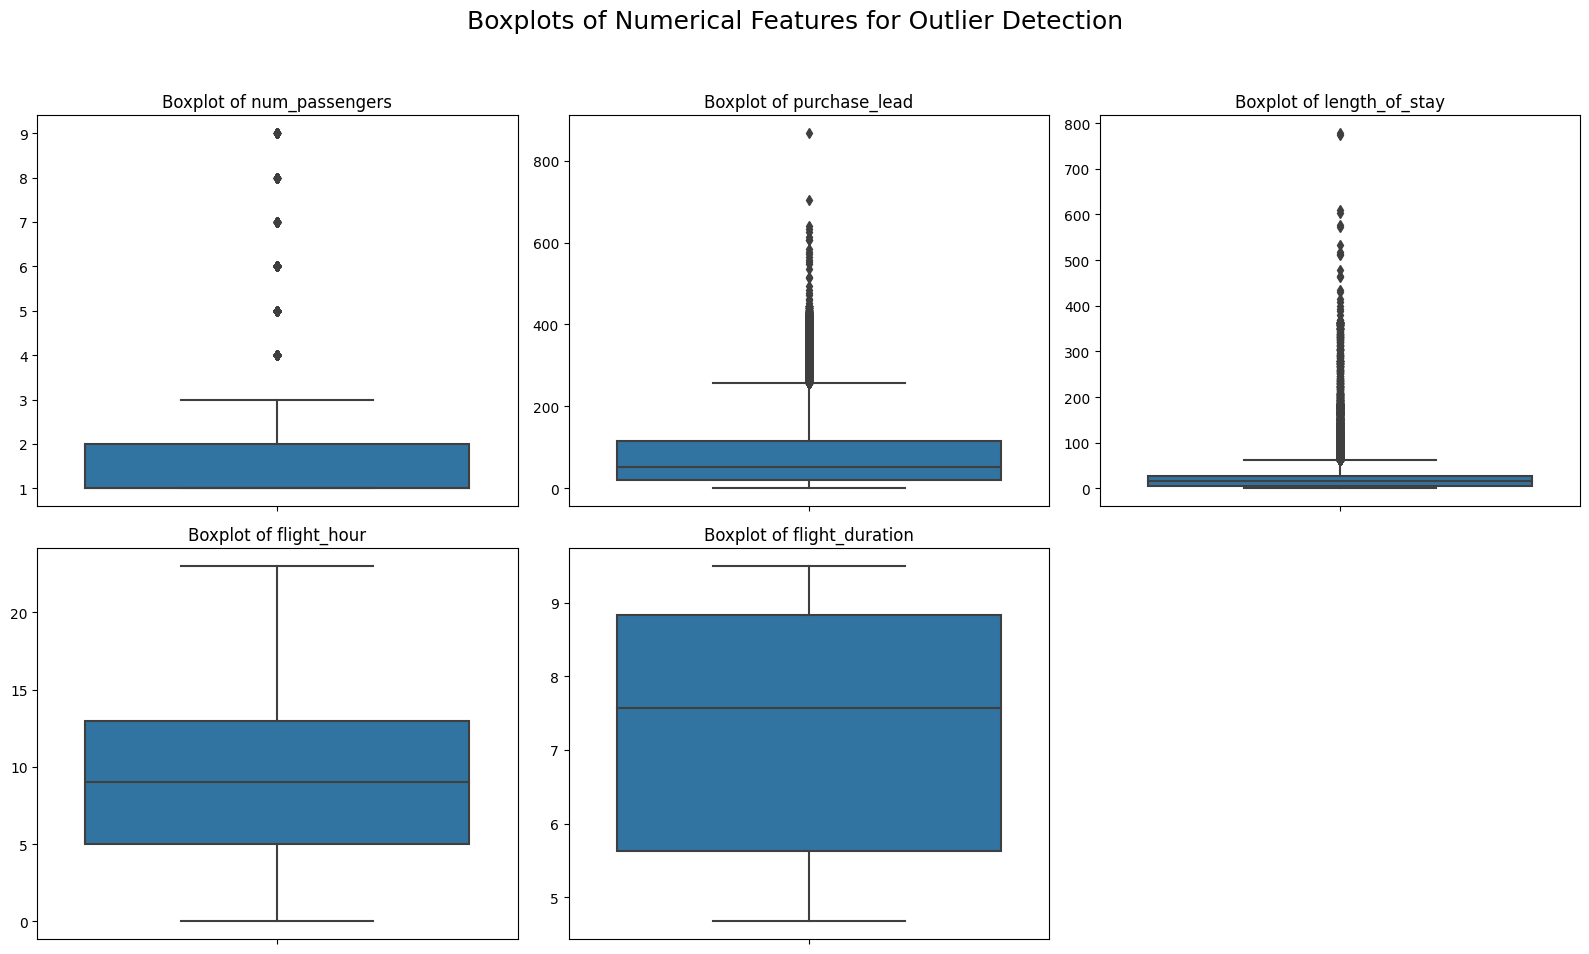

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load the data ---
# Make sure 'Passanger_booking_data.csv' is in the same directory
# or provide the full path to the file.
df = pd.read_csv('/kaggle/input/airline-passangers-booking-data/Passanger_booking_data.csv')
print("Successfully loaded the dataset.")

# --- Step 2: Convert 'flight_day' to an ordered categorical type ---
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['flight_day'] = pd.Categorical(df['flight_day'], categories=day_order, ordered=True)
print("\n--- Data types after converting 'flight_day' ---")
df.info()

# --- Step 3: Outlier Detection using Boxplots ---
numerical_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel('')

plt.suptitle('Boxplots of Numerical Features for Outlier Detection', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('outlier_boxplots.png')
print("\nGenerated 'outlier_boxplots.png' to visualize potential outliers.")

# --- Step 4: Save the Cleaned Data ---
cleaned_file_path = 'Passanger_booking_data_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaning task is complete. The processed dataset has been saved to '{cleaned_file_path}'.")

# 🧹 Data Quality Check: Missing Values and Duplicates

This section ensures that the dataset is clean and ready for analysis by checking for missing values (NaNs) and duplicate rows.  
Both checks are crucial to maintain the integrity and accuracy of downstream data analysis or machine learning models.

---

### **Code & Explanation**

```python
import pandas as pd
```
Choice: Import the pandas library.
Justification: pandas provides the tools needed for structured data manipulation,
including handling missing values and identifying duplicates efficiently.

 Load the dataset from the provided file path
```python

df = pd.read_csv('/kaggle/input/airline-passangers-booking-data/Passanger_booking_data.csv')
```
Choice: Read the dataset into a pandas DataFrame.
Justification: Using pd.read_csv() loads the data from the Kaggle input directory
into a DataFrame, making it accessible for inspection and cleaning.
This is a standard and efficient way to initialize data analysis.

### --- 1. Check for NaN (Null) Values ---
```python

nan_check = df.isnull().sum()
print("--- NaN (Null) Value Check ---")
print(nan_check[nan_check > 0])  # Only print columns that have nulls
if df.isnull().sum().sum() == 0:
    print("Result: No NaN values found. 👍")
```
Choice: Detect and summarize missing values in the dataset.
Justification:
- df.isnull().sum() counts missing entries per column.
- Printing only columns with nulls focuses the output on problematic areas.
- The conditional check verifies if there are *any* missing values in the entire DataFrame.
This step ensures that no information gaps could bias the analysis or cause model errors later.

### --- 2. Check for Duplicate Rows ---
```python

duplicate_count = df.duplicated().sum()
print("\n--- Duplicate Row Check ---")
print(f"Result: Found {duplicate_count} duplicate rows.")
```
Choice: Identify and count duplicate rows using df.duplicated().
 Justification:
- Duplicate rows can distort statistics and lead to biased model training.
- .duplicated().sum() provides a quick numeric summary of how many duplicates exist.
- Displaying the result immediately allows for decisions on whether to drop duplicates
or further investigate data sources for repeated entries.


In [4]:
import pandas as pd

# Load the dataset from the file you provided
df = pd.read_csv('/kaggle/input/airline-passangers-booking-data/Passanger_booking_data.csv')

# --- 1. Check for NaN (Null) Values ---
nan_check = df.isnull().sum()
print("--- NaN (Null) Value Check ---")
print(nan_check[nan_check > 0]) # Only print columns that have nulls
if df.isnull().sum().sum() == 0:
    print("Result: No NaN values found. 👍")

# --- 2. Check for Duplicate Rows ---
duplicate_count = df.duplicated().sum()
print("\n--- Duplicate Row Check ---")
print(f"Result: Found {duplicate_count} duplicate rows.")

--- NaN (Null) Value Check ---
Series([], dtype: int64)
Result: No NaN values found. 👍

--- Duplicate Row Check ---
Result: Found 719 duplicate rows.


# 🧹 Data Cleaning: Removing Duplicate Entries and Saving the Cleaned Dataset

This section of the notebook focuses on cleaning the dataset by eliminating duplicate rows and saving the cleaned version for future use.  
Removing duplicates ensures that every record in the dataset is unique, preventing bias or redundancy in further analysis and modeling.

---

### **Code & Explanation**

```python
import pandas as pd
```
Choice: Import the pandas library.
Justification: pandas is a foundational library for data cleaning, manipulation, and analysis.
It offers efficient functions like drop_duplicates() and to_csv() for cleaning and exporting data.
### --- Step 1: Load the data ---
Make sure 'Passanger_booking_data.csv' is accessible
```python

df = pd.read_csv('/kaggle/input/airline-passangers-booking-data/Passanger_booking_data.csv')
print(f"Original dataset shape: {df.shape}")
```
Choice: Load the dataset from a CSV file using pd.read_csv().
Justification:
- This reads the structured CSV file into a pandas DataFrame.
- Displaying df.shape provides the number of rows and columns before cleaning,
   giving a baseline reference to measure the impact of duplicate removal.

### --- Step 2: Remove duplicate rows ---
```python

df.drop_duplicates(inplace=True)
print("Duplicate rows have been removed.")
```
Choice: Use df.drop_duplicates() to remove redundant rows.
Justification:
- drop_duplicates() scans all columns and eliminates exact row duplicates.
- inplace=True modifies the DataFrame directly, avoiding the need to reassign it.
- Removing duplicates ensures each record in the dataset is unique, improving data integrity
-    and avoiding repetition in summary statistics or machine learning training.

### --- Step 3: Verify the removal ---
```python

remaining_duplicates = df.duplicated().sum()
print(f"Remaining duplicate rows: {remaining_duplicates}")
print(f"New dataset shape after removing duplicates: {df.shape}")
```
Choice: Validate the duplicate removal by counting remaining duplicates.
Justification:
- duplicated().sum() confirms whether any repeated rows still exist.
- Comparing the shape before and after cleaning helps ensure the operation worked as expected.
- This verification step is a best practice in data cleaning workflows.

### --- Step 4: Save the final cleaned file ---
```python

cleaned_file_path = 'Passanger_booking_data_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"\nFinal, cleaned dataset saved to '{cleaned_file_path}'.")
```
Choice: Save the cleaned dataset to a new CSV file.
Justification:
- to_csv() exports the DataFrame for reuse or later stages of the project.
- index=False prevents pandas from adding a numerical index column to the saved file.
- This ensures the cleaned dataset is ready for further analysis, visualization, or model training.


In [5]:
import pandas as pd

# --- Step 1: Load the data ---
# Make sure 'Passanger_booking_data.csv' is accessible
df = pd.read_csv('/kaggle/input/airline-passangers-booking-data/Passanger_booking_data.csv')
print(f"Original dataset shape: {df.shape}")

# --- Step 2: Remove duplicate rows ---
# The drop_duplicates() function removes all duplicate rows.
# 'inplace=True' modifies the DataFrame directly.
df.drop_duplicates(inplace=True)
print("Duplicate rows have been removed.")

# --- Step 3: Verify the removal ---
# The count of duplicates should now be 0.
remaining_duplicates = df.duplicated().sum()
print(f"Remaining duplicate rows: {remaining_duplicates}")
print(f"New dataset shape after removing duplicates: {df.shape}")

# --- Step 4: Save the final cleaned file ---
# This is our fully cleaned file, ready for the next project phase.
cleaned_file_path = 'Passanger_booking_data_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"\nFinal, cleaned dataset saved to '{cleaned_file_path}'.")

Original dataset shape: (50002, 14)
Duplicate rows have been removed.
Remaining duplicate rows: 0
New dataset shape after removing duplicates: (49283, 14)

Final, cleaned dataset saved to 'Passanger_booking_data_cleaned.csv'.
